 # N. MANZANO -Comisión: 32830 -Data Science

    
 # Defunciones, Tipo Mortalidad y Género de la ESE Hospital Departamental San Antonio Pitalito Huila- Colombia. Año 2020
    
    https://www.gov.co/ Trámites, servicios e información del Estado colombiano.
        https://www.datos.gov.co/resource/5n4t-3dgk.json




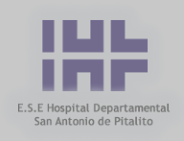

El Hospital Departamental San Antonio de Pitalito es una institución de salud pública ubicada en el municipio de Pitalito, en el departamento de Huila, Colombia. Pitalito está localizado en el sur oriente del departamento de Huila.
La Secretaría de Salud del Departamento del Huila, informa que Pitalito cuenta con tres hospitales públicos: Hospital Departamental San Antonio, Hospital Universitario San Agustín y Hospital de Pitalito.




    Al trabajar con un Dataset de Ciudad de Buenos Aires, me resultó interesante buscar algo similar de otro país e 
    interiorizarme sobre sus registros de mortalidad.
Al observar este tipo de datos, suelo hacerme 2 preguntas:
Cuál es la mayor causa de mortalidad?
Tienen algún tipo de cobertura médica?

***Audiencia:***

    Mi análisis se centrará en contestar estas preguntas con los datos publicados del año 2020 que corresponden al sector de Salud y Protección Social del Hospital Departamental San Antonio de Pitalito en Colombia.

Este análisis intentará contestar las preguntas anteriores, pudiendo ser de utilidad para cualquier persona interesada en Salud Pública o que quiera hacer un comparativo con información similar sobre defunciones de otra región.

***Limitaciones:***
    
    Nos estaremos basando sólo en un año, el 2020, dado que no hay publicaciones posteriores, o anteriores. 
    No son consecuentes con la publicación de sus datos.




***Preguntas de interés***

*Preguntas Principales*

*Cuál es la mayor causa de mortalidad?

*Tienen algún tipo de cobertura médica?


*Otras Preguntas*

*Cómo se dividen los tipos de defunciones?

*Predominan hombres o mujeres?

*En qué lugar físico se producen la mayoría de las defunciones? Y en qué área?

*Han recibido asistencia médica?



In [1]:
import requests
import pandas as pd
import json
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib as mpl

***LECTURA, ANÁLISIS EXPLORATORIO Y LIMPIEZA DE DATOS***

In [2]:
url= 'https://www.datos.gov.co/resource/5n4t-3dgk.json'
df= requests.get(url)
print(df)

<Response [200]>


In [3]:
print(len(df.text))

1463039


In [4]:
texto=df.text


In [5]:
jsondata=json.loads(texto)
df2=pd.DataFrame.from_dict(jsondata)
df2.head(3)


,n_mero_certificado,departamento,municipio,area_defunci_n,sitio_defunci_n,c_digo_instituci_n,nombre_instituci_n,tipo_defunci_n,fecha_defunci_n,sexo_fallecido,...,mecanismo_3,embarazada_cuando_falleci,embarazada_ltimas_6_semanas,embarazada_ltimos_12_meses,mecanismo_1,tipo_muerte_violenta,descripci_n_muerte_violenta,departamento_muerte_violenta,municipio_muerte_violenta,direcci_n_muerte_violenta
0,720785565,HUILA,PITALITO,CABECERA MUNICIPAL,HOSPITAL/CLÍNICA,415510047901,E.S.E. HOSPITAL DEPARTAMENTAL SAN ANTONIO DE P...,FETAL,2020-01-02T00:00:00.000,FEMENINO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,720785572,HUILA,PITALITO,CABECERA MUNICIPAL,HOSPITAL/CLÍNICA,415510047901,E.S.E. HOSPITAL DEPARTAMENTAL SAN ANTONIO DE P...,NO FETAL,2020-01-03T00:00:00.000,MASCULINO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,720785586,HUILA,PITALITO,CABECERA MUNICIPAL,HOSPITAL/CLÍNICA,415510047901,E.S.E. HOSPITAL DEPARTAMENTAL SAN ANTONIO DE P...,FETAL,2020-01-04T00:00:00.000,INDETERMINADO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   n_mero_certificado             915 non-null    object
 1   departamento                   915 non-null    object
 2   municipio                      915 non-null    object
 3   area_defunci_n                 915 non-null    object
 4   sitio_defunci_n                915 non-null    object
 5   c_digo_instituci_n             915 non-null    object
 6   nombre_instituci_n             915 non-null    object
 7   tipo_defunci_n                 915 non-null    object
 8   fecha_defunci_n                915 non-null    object
 9   sexo_fallecido                 915 non-null    object
 10  pa_s_residencia                914 non-null    object
 11  departamento_residencia        914 non-null    object
 12  municipio_residencia           914 non-null    object
 13  area_

In [7]:
df2.describe()

,n_mero_certificado,departamento,municipio,area_defunci_n,sitio_defunci_n,c_digo_instituci_n,nombre_instituci_n,tipo_defunci_n,fecha_defunci_n,sexo_fallecido,...,mecanismo_3,embarazada_cuando_falleci,embarazada_ltimas_6_semanas,embarazada_ltimos_12_meses,mecanismo_1,tipo_muerte_violenta,descripci_n_muerte_violenta,departamento_muerte_violenta,municipio_muerte_violenta,direcci_n_muerte_violenta
count,915,915,915,915,915,915,915,915,915,915,...,139,32,32,32,8,6,6,6,6,6
unique,915,1,1,3,5,1,1,2,334,3,...,1,2,2,2,1,3,6,1,2,6
top,720785565,HUILA,PITALITO,CABECERA MUNICIPAL,HOSPITAL/CLÍNICA,415510047901,E.S.E. HOSPITAL DEPARTAMENTAL SAN ANTONIO DE P...,NO FETAL,2020-01-17T00:00:00.000,INDETERMINADO,...,PRUEBAS LABORATORIO,NO,NO,NO,NECROPSIA,ACCIDENTE DE TRÁNSITO,N EL ACTA DE INSPECCIÓN TÉCNICA A CADÁVER N 2...,HUILA,PITALITO,KILOMETRO 119500 VIA POPAYAN LA PORTADA VEREDA...
freq,1,915,915,889,860,915,915,469,8,395,...,139,31,29,29,8,3,1,6,5,1


In [8]:
print(df2.shape)
df2= df2.drop_duplicates()
print(df2.shape) #verificamos si hay datos duplicados

(915, 66)
(915, 66)


In [9]:
pd.set_option('display.max_rows', None) 
serie=(df2.isnull().sum()/df2.shape[0])
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie #Exploramos datos nulos

direcci_n_muerte_violenta       0.993443
municipio_muerte_violenta       0.993443
departamento_muerte_violenta    0.993443
descripci_n_muerte_violenta     0.993443
tipo_muerte_violenta            0.993443
mecanismo_1                     0.991257
embarazada_ltimos_12_meses      0.965027
embarazada_ltimas_6_semanas     0.965027
embarazada_cuando_falleci       0.965027
causa_antecedentes_d            0.890710
mecanismo_3                     0.848087
mecanismo_4                     0.827322
estados_patol_gicos             0.749727
causa_antecedentes_c            0.594536
tiempo_gestaci_n                0.535519
peso_feto                       0.509290
ocupaci_n_fallecido             0.507104
hijos_nacidos_muertos           0.502732
hijos_nacidos_vivos             0.502732
apellidos_madre                 0.502732
nombres_madre                   0.502732
n_mero_documento_madre          0.502732
tipo_documento_madre            0.502732
multiplicidad                   0.502732
tipo_parto      

<AxesSubplot:>

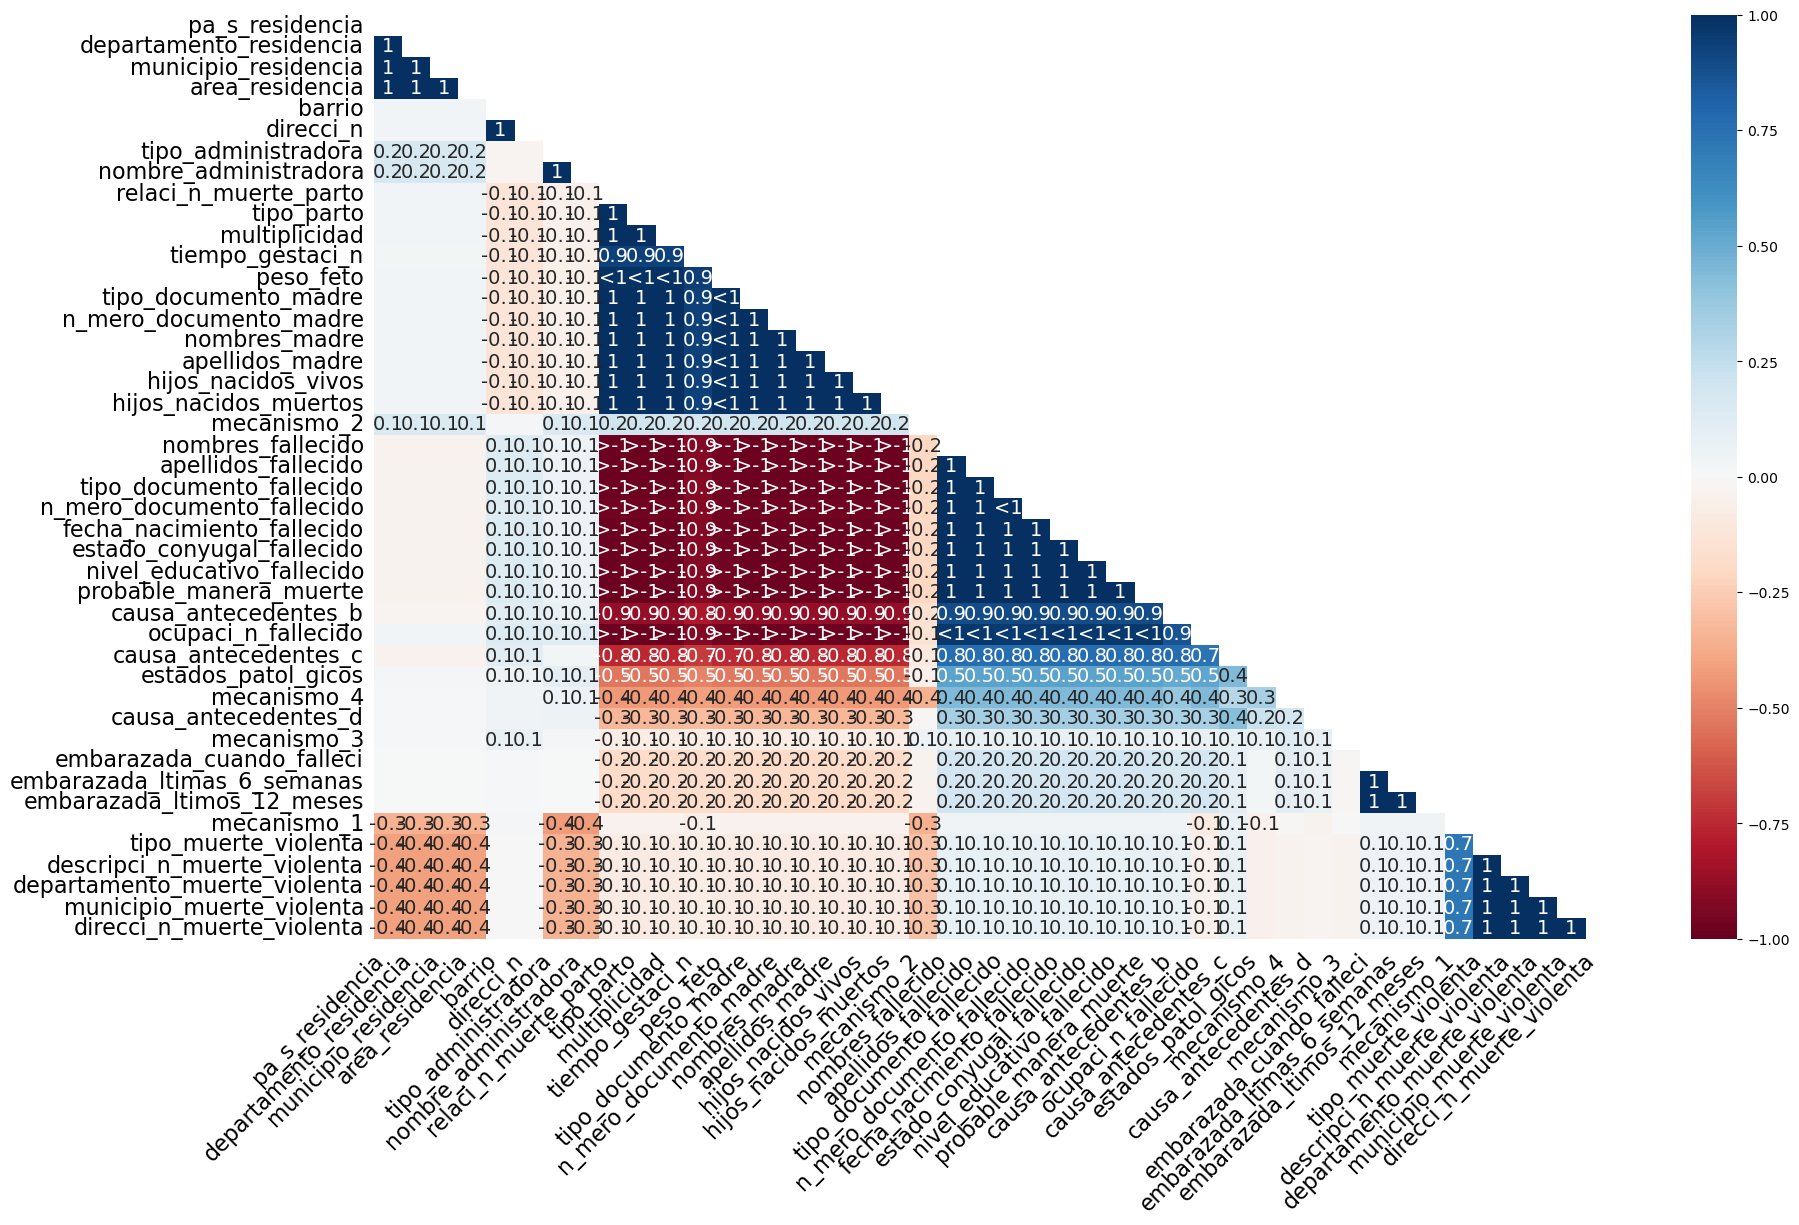

In [10]:
msno.heatmap(df2)

In [11]:
df2.isna().sum()

n_mero_certificado                 0
departamento                       0
municipio                          0
area_defunci_n                     0
sitio_defunci_n                    0
c_digo_instituci_n                 0
nombre_instituci_n                 0
tipo_defunci_n                     0
fecha_defunci_n                    0
sexo_fallecido                     0
pa_s_residencia                    1
departamento_residencia            1
municipio_residencia               1
area_residencia                    1
barrio                           424
direcci_n                        424
r_gimen_seguridad                  0
tipo_administradora               33
nombre_administradora             33
expedido_por                       0
relaci_n_muerte_parto            460
tipo_parto                       460
multiplicidad                    460
tiempo_gestaci_n                 490
peso_feto                        466
tipo_documento_madre             460
n_mero_documento_madre           460
n

***ELIMINAMOS Y REEMPLAZAMOS ALGUNAS COLUMNAS Y NULOS***

In [12]:
df2 = df2.drop (columns=['direcci_n_muerte_violenta', 'municipio_muerte_violenta','departamento_muerte_violenta','descripci_n_muerte_violenta','tipo_muerte_violenta',
'mecanismo_1','embarazada_ltimos_12_meses','embarazada_ltimas_6_semanas','causa_antecedentes_d','embarazada_cuando_falleci','causa_antecedentes_b','causa_antecedentes_c','mecanismo_3','mecanismo_4', 'estados_patol_gicos','tiempo_gestaci_n','peso_feto', 'ocupaci_n_fallecido','hijos_nacidos_muertos','hijos_nacidos_vivos','apellidos_madre','nombres_madre','n_mero_documento_madre', 'tipo_documento_madre', 'multiplicidad','tipo_parto','relaci_n_muerte_parto','n_mero_documento_fallecido','apellidos_fallecido','estado_conyugal_fallecido','nivel_educativo_fallecido','probable_manera_muerte','tipo_documento_fallecido','barrio','direcci_n','causa_antecedentes_b','mecanismo_2','nombre_administradora','area_residencia','n_mero_certificado','tipo_documento_certificador','n_mero_documento_certificador','r_gimen_seguridad','nombres_fallecido','tipo_profesional','registro_profesional','estado_certificado'])

In [13]:
print(df2.shape) 

(915, 20)


In [14]:
col_reemp=['causa_directa','fecha_nacimiento_fallecido','fecha_defunci_n','tipo_administradora']

In [15]:
for i in col_reemp: df2 = df2.fillna('Desconocido') 

In [16]:
df2.rename({'area_defunci_n' : 'area_defuncion'}, axis=1, inplace = True)
df2.rename({'sitio_defunci_n' : 'sitio_defuncion'}, axis=1, inplace = True)
df2.rename({'c_digo_instituci_n' : 'codigo_institucion'}, axis=1, inplace = True)
df2.rename({'nombre_instituci_n' : 'nombre_institucion'}, axis=1, inplace = True)
df2.rename({'tipo_defunci_n' : 'tipo_defuncion'}, axis=1, inplace = True)
df2.rename({'fecha_defunci_n' : 'fecha_defuncion'}, axis=1, inplace = True)
df2.rename({'pa_s_residencia' : 'pais_residencia'}, axis=1, inplace = True)
df2.rename({'departamento_expedici_n' : 'departamento_expedicion'}, axis=1, inplace = True)
df2.rename({'municipio_expedici_n' : 'municipio_expedicion'}, axis=1, inplace = True)

In [18]:
df2. head()

,departamento,municipio,area_defuncion,sitio_defuncion,codigo_institucion,nombre_institucion,tipo_defuncion,fecha_defuncion,sexo_fallecido,pais_residencia,departamento_residencia,municipio_residencia,tipo_administradora,expedido_por,recibi_asistencia_medica,causa_directa,nombres_y_apellidos,departamento_expedicion,municipio_expedicion,fecha_nacimiento_fallecido
0,HUILA,PITALITO,CABECERA MUNICIPAL,HOSPITAL/CLÍNICA,415510047901,E.S.E. HOSPITAL DEPARTAMENTAL SAN ANTONIO DE P...,FETAL,2020-01-02T00:00:00.000,FEMENINO,COLOMBIA,HUILA,PITALITO,ENTIDAD PROMOTORA DE SALUD SUBSIDIADO,MÉDICO TRATANTE,SI,CORIOAMNIONITIS,EDELMIRA DE JESUS PAVIA HERNANDEZ,HUILA,PITALITO,Desconocido
1,HUILA,PITALITO,CABECERA MUNICIPAL,HOSPITAL/CLÍNICA,415510047901,E.S.E. HOSPITAL DEPARTAMENTAL SAN ANTONIO DE P...,NO FETAL,2020-01-03T00:00:00.000,MASCULINO,COLOMBIA,HUILA,PITALITO,ENTIDAD PROMOTORA DE SALUD SUBSIDIADO,MÉDICO NO TRATANTE,SI,INSUFICIENCIA RESPIRATORIA AGUDA,IRINA PATRICIA SANTIAGO BANQUEZ,HUILA,PITALITO,2020-01-03T00:00:00.000
2,HUILA,PITALITO,CABECERA MUNICIPAL,HOSPITAL/CLÍNICA,415510047901,E.S.E. HOSPITAL DEPARTAMENTAL SAN ANTONIO DE P...,FETAL,2020-01-04T00:00:00.000,INDETERMINADO,COLOMBIA,HUILA,PITALITO,ENTIDAD PROMOTORA DE SALUD SUBSIDIADO,MÉDICO TRATANTE,SI,ABORTO INCOMPLETO,JAVIER ENRIQUE PEREZ MORON,HUILA,PITALITO,Desconocido
3,HUILA,PITALITO,CABECERA MUNICIPAL,HOSPITAL/CLÍNICA,415510047901,E.S.E. HOSPITAL DEPARTAMENTAL SAN ANTONIO DE P...,FETAL,2020-01-05T00:00:00.000,INDETERMINADO,COLOMBIA,HUILA,ACEVEDO,ENTIDAD PROMOTORA DE SALUD,MÉDICO TRATANTE,SI,ABORTO INCOMPLETO,JAVIER ENRIQUE PEREZ MORON,HUILA,PITALITO,Desconocido
4,HUILA,PITALITO,CABECERA MUNICIPAL,HOSPITAL/CLÍNICA,415510047901,E.S.E. HOSPITAL DEPARTAMENTAL SAN ANTONIO DE P...,FETAL,2020-01-06T00:00:00.000,INDETERMINADO,COLOMBIA,HUILA,PITALITO,ENTIDAD PROMOTORA DE SALUD SUBSIDIADO,MÉDICO TRATANTE,SI,ABORTO INCOMPLETO,JAVIER ENRIQUE PEREZ MORON,HUILA,PITALITO,Desconocido


***Convertimos las columnas de fechas de object a datetime***

In [19]:
df2['fecha_defuncion'] = pd.to_datetime(df2['fecha_defuncion'])
df2['fecha_nacimiento_fallecido'] = pd.to_datetime(df2['fecha_nacimiento_fallecido'] , errors='coerce')

In [20]:
df2. head(3)

,departamento,municipio,area_defuncion,sitio_defuncion,codigo_institucion,nombre_institucion,tipo_defuncion,fecha_defuncion,sexo_fallecido,pais_residencia,departamento_residencia,municipio_residencia,tipo_administradora,expedido_por,recibi_asistencia_medica,causa_directa,nombres_y_apellidos,departamento_expedicion,municipio_expedicion,fecha_nacimiento_fallecido
0,HUILA,PITALITO,CABECERA MUNICIPAL,HOSPITAL/CLÍNICA,415510047901,E.S.E. HOSPITAL DEPARTAMENTAL SAN ANTONIO DE P...,FETAL,2020-01-02,FEMENINO,COLOMBIA,HUILA,PITALITO,ENTIDAD PROMOTORA DE SALUD SUBSIDIADO,MÉDICO TRATANTE,SI,CORIOAMNIONITIS,EDELMIRA DE JESUS PAVIA HERNANDEZ,HUILA,PITALITO,NaT
1,HUILA,PITALITO,CABECERA MUNICIPAL,HOSPITAL/CLÍNICA,415510047901,E.S.E. HOSPITAL DEPARTAMENTAL SAN ANTONIO DE P...,NO FETAL,2020-01-03,MASCULINO,COLOMBIA,HUILA,PITALITO,ENTIDAD PROMOTORA DE SALUD SUBSIDIADO,MÉDICO NO TRATANTE,SI,INSUFICIENCIA RESPIRATORIA AGUDA,IRINA PATRICIA SANTIAGO BANQUEZ,HUILA,PITALITO,2020-01-03
2,HUILA,PITALITO,CABECERA MUNICIPAL,HOSPITAL/CLÍNICA,415510047901,E.S.E. HOSPITAL DEPARTAMENTAL SAN ANTONIO DE P...,FETAL,2020-01-04,INDETERMINADO,COLOMBIA,HUILA,PITALITO,ENTIDAD PROMOTORA DE SALUD SUBSIDIADO,MÉDICO TRATANTE,SI,ABORTO INCOMPLETO,JAVIER ENRIQUE PEREZ MORON,HUILA,PITALITO,NaT


In [24]:
df2.columns

Index(['departamento', 'municipio', 'area_defuncion', 'sitio_defuncion',
       'codigo_institucion', 'nombre_institucion', 'tipo_defuncion',
       'fecha_defuncion', 'sexo_fallecido', 'pais_residencia',
       'departamento_residencia', 'municipio_residencia',
       'tipo_administradora', 'expedido_por', 'recibi_asistencia_medica',
       'causa_directa', 'nombres_y_apellidos', 'departamento_expedicion',
       'municipio_expedicion', 'fecha_nacimiento_fallecido'],
      dtype='object')

***COMENZAMOS EL ANÁLISIS PARA OBTENER INSIGHTS Y RESPONDER NUESTRAS PREGUNTAS**

Text(0.5, 1.0, 'tipo def.por sitio de fallecimiento')

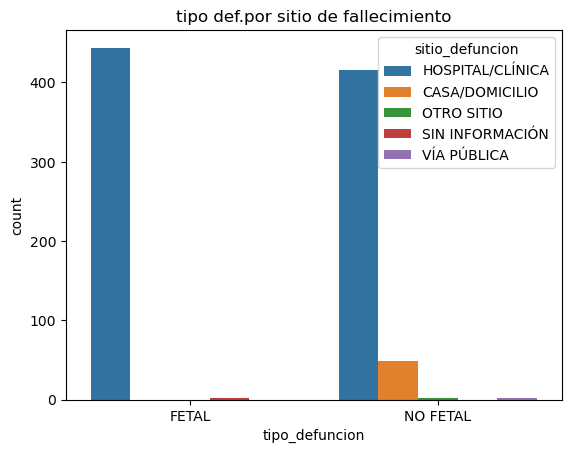

In [58]:
sns.countplot(data=df2, x="tipo_defuncion", hue="sitio_defuncion")
plt.title('tipo def.por sitio de fallecimiento')

Podemos observar que las defunciones en el Hospital son clasificadas por fetales y no fetales
Y según una breve investigación, esto se debe a que el hospital posee una sala de maternidad.
También se clasifican por sexo del fallecido, podemos inferir que al tratarse de un feto, en algunos casos el sexo será indeterminado.

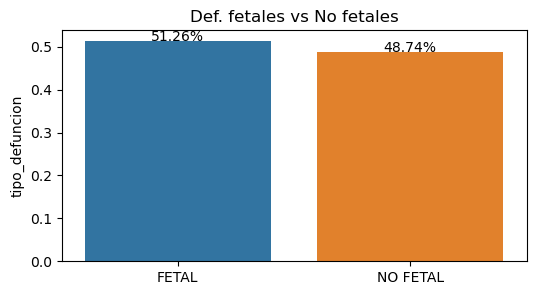

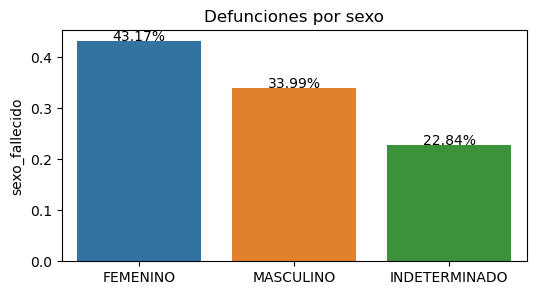

In [24]:
plt.figure(figsize=(6,3))
x=df2["tipo_defuncion"].unique()
y=df2["tipo_defuncion"].value_counts()/df2["tipo_defuncion"].value_counts().sum()
ax=sns.barplot(x=x,y=y)
ax.set_title("")
plt.title('Def. fetales vs No fetales')
for i, v in enumerate(y):ax.text(i, v, f"{v:.2%}", color='black', ha="center")
plt.show()


plt.figure(figsize=(6,3))
x=df2["sexo_fallecido"].unique()
y=df2["sexo_fallecido"].value_counts()/df2["sexo_fallecido"].value_counts().sum()
ax=sns.barplot(x=x,y=y)
ax.set_title("")
plt.title('Defunciones por sexo')
for i, v in enumerate(y):ax.text(i, v, f"{v:.2%}", color='black', ha="center")
plt.show()

El área de residencia del fallecido es tomado como dato, segmentándose en: cabecera municipal, rural disperso y centro poblado.
    El 97.16% de los fallecidos pertenece al área cabecera municipal. Que es el área geográfica que está definida por un perímetro urbano.

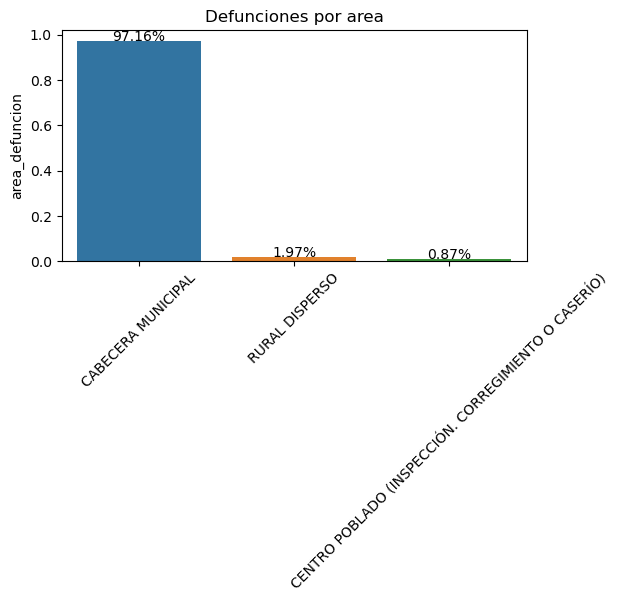

In [25]:
plt.figure(figsize=(6,3))
x=df2["area_defuncion"].unique()
y=df2["area_defuncion"].value_counts()/df2["area_defuncion"].value_counts().sum()
ax=sns.barplot(x=x,y=y)
ax.set_title("")
plt.xticks(rotation=45)
plt.title('Defunciones por area')
for i, v in enumerate(y):ax.text(i, v, f"{v:.2%}", color='black', ha="center")
plt.show()

Observamos que tanto las defunciones fetales, como no fetales son las que ampliamente predominan en la cabecera municipal, muy lejos continúan las no fetales del área rural disperso.

Text(0.5, 1.0, 'Tpo def por área')

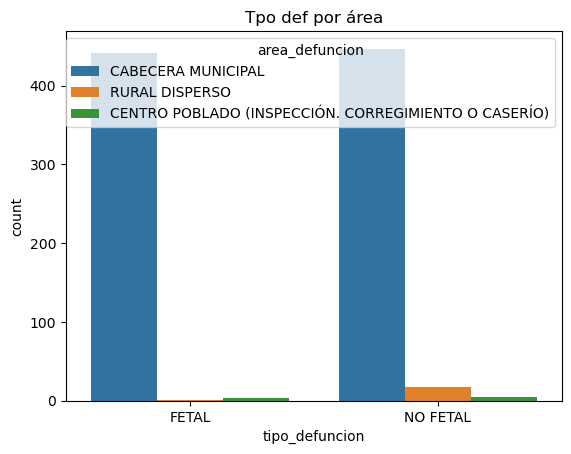

In [57]:

sns.countplot(data=df2, x="tipo_defuncion", hue="area_defuncion")
plt.title('Tpo def por área')

Es importante visualizar que el 96.28% recibió atención médica antes de su fallecimiento, y de los que no recibieron en su mayoría se trata de muertes no fetales.

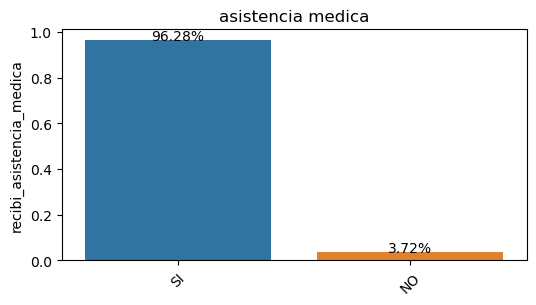

In [52]:
plt.figure(figsize=(6,3))
x=df2["recibi_asistencia_medica"].unique()
y=df2["recibi_asistencia_medica"].value_counts()/df2["recibi_asistencia_medica"].value_counts().sum()
ax=sns.barplot(x=x,y=y)
ax.set_title("")
plt.xticks(rotation=45)
plt.title('asistencia medica')
for i, v in enumerate(y):ax.text(i, v, f"{v:.2%}", color='black', ha="center")
plt.show()

Text(0.5, 1.0, 'Asistencia médica x tipo def.')

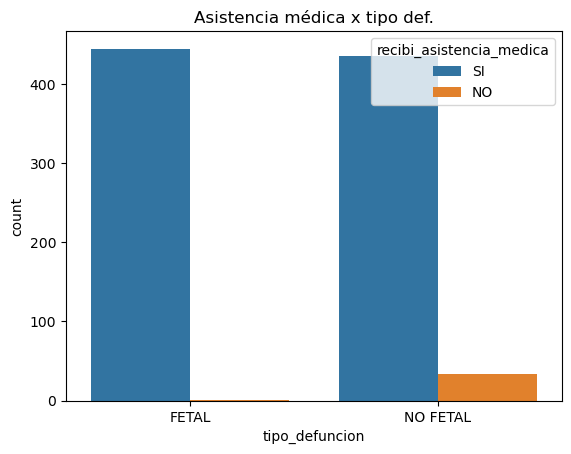

In [55]:
sns.countplot(data=df2, x="tipo_defuncion", hue="recibi_asistencia_medica")
plt.title('Asistencia médica x tipo def.')


Siendo varias las causas directas de defunción, se realiza un top 10 para ver cuáles predominan, y se observa que las relacionadas a maternidad son las más frecuentes, como aborto retenido y aborto incompleto, y en 3er puesto la de insuficiencia respiratoria aguda

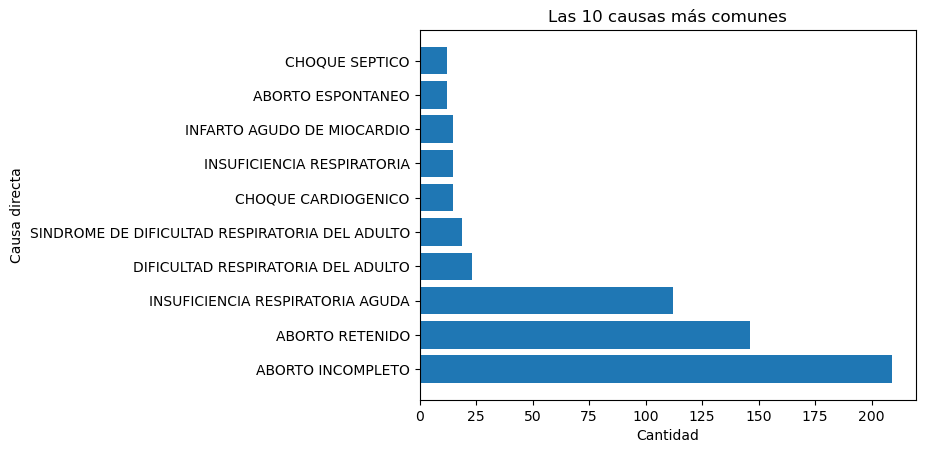

In [50]:
top_10 = df2.causa_directa.value_counts().head(10)
plt.barh(top_10.index, top_10.values)
plt.xlabel('Cantidad')
plt.ylabel('Causa directa')
plt.title('Las 10 causas más comunes')
plt.show()

En Colombia desde el año 1991 se estableció el derecho de todos los colombianos a la atención a la salud como un servicio público.
Sin embargo, existen sistemas de cobertura privada en su totalidad, como también un sistema subsidiado.

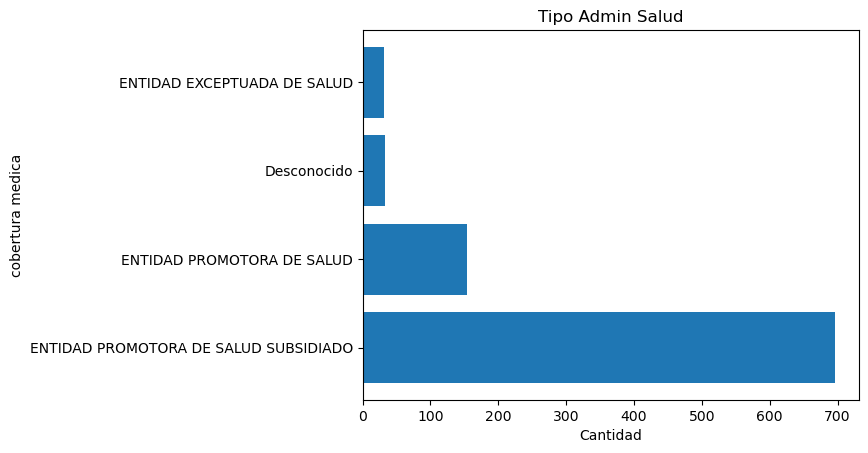

In [46]:
cobmed = df2.tipo_administradora.value_counts()
plt.barh(cobmed.index, cobmed.values)
plt.xlabel('Cantidad')
plt.ylabel('cobertura medica')
plt.title('Tipo Admin Salud')
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'ENTIDAD PROMOTORA DE SALUD SUBSIDIADO'),
  Text(1, 0, 'ENTIDAD PROMOTORA DE SALUD'),
  Text(2, 0, 'Desconocido'),
  Text(3, 0, 'ENTIDAD EXCEPTUADA DE SALUD')])

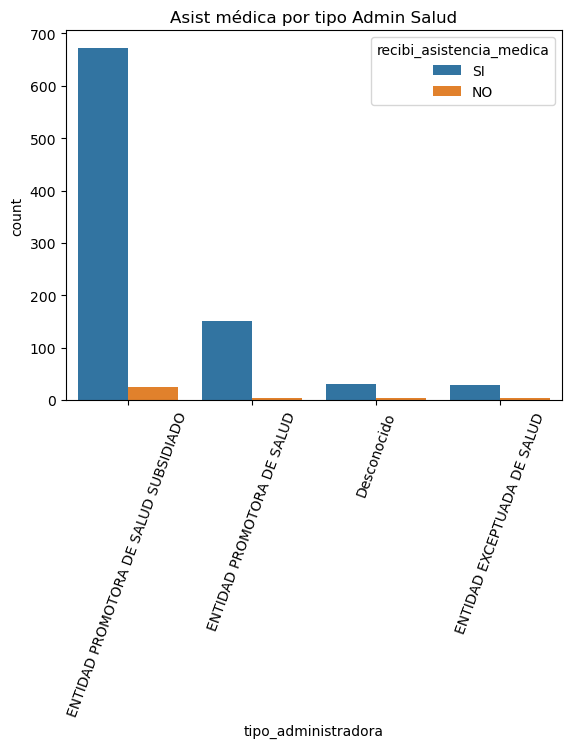

In [25]:

sns.countplot(data=df2, x="tipo_administradora", hue="recibi_asistencia_medica")
plt.title('Asist médica por tipo Admin Salud')
plt.xticks(rotation=70)

# INSIGHTS & CONCLUSIONES

Las defunciones registradas en el Hospital Departamental San Antonio Pitalito se producen en la mayoría en el Hospital  y en segundo lugar en el domicilio de la persona.

Son clasificadas como fetales y no fetales (poseen un sector de maternidad desde el año 1936). 

Prevalecen las defunciones del sexo femenino y si bien se encuentra en tercer lugar, un 22.84% es de sexo indeterminado.

Las defunciones fetales son levemente mayores a las no fetales registradas. Y en su mayoría los fallecidos residían en la cabecera municipal.

De la totalidad de fallecidos un 96.28% recibió asistencia médica previo a su deceso, teniendo en primer lugar un servicio de salud subsidiado. 


***Respuesta a nuestra preguntas principales:***
        
La mayoría de los pacientes poseía un servicio de cobertura médica subsidiado

Vemos que en el hospital la mayor causa de fallecimientos son las asociadas al sector de maternidad, dado que prevalecen las causas de muerte por aborto incompleto y aborto retenido.
